# Capstone project proposal by Jörg Schreiner

# Political orientation of Swiss communes from a data science perspective

## 1) The problem

Using the detailed data that is available 
- about the 2'202 __Swiss communes__
- from sources like the __Federal Statistical Office__, the __Federal Tax Administration__, the __Federal Office of Public Health__, or the __State Secretariat for Economic Affairs__, supplemented with less conventional data providers like e.g. __Swiss Federal Railways__ or __geographical data__

My proposal is
- to predict the __political orientation__ of the municipalities as expressed in the 2019 federal elections ("Nationalratswahlen")
- to identify __significant factors__ that influence the political orientation
- to __compare__ a linear regression model __with other non-linear regression models__ (e.g. random forest or support vector regression)

The dependent variable, political orientation, in the context of this project will be a single number that summarizes how far left-leaning or right-leaning a municipality has voted. This will be computed by assigning each party a left/right value and then getting the sum of party values weighted by election results.

Example:

Given these party left/right values

| -2 | -1 | 0 | +1 | +2 |
|---|---|---|---|---|
|GPS|SP |CVP|FDP|SVP|
|PdA| -  |GLP|BDP|RW*|
| - | -  |EVP| - | - |

and these election results

&nbsp; |**GPS**|**SP**|**GLP**|**CVP**|**FDP**|**SVP**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
Lausanne|27%|27%|7%|2%|15%|9%
Schwyz|3%|18%|3%|25%|20%|30%

the political-orientation value is **-0.55 for Lausanne** and **+0.57 for Schwyz**. So Lausanne leans to the left politically and Schwyz to the right. Intuitively that is not surprising. The aim of the capstone project is to quantify it and find out what leads to that (social, economic, geographic, ... factors).

Please consult the notebook [Political Parties in CH](./Political%20Parties%20in%20CH.ipynb) for a more detailed description of the parties, the political spectrum and the formula for the political orientation value.

## 2) The data

### (a) Clear overview of your data

The data I will be using for the project is a combination of at least 10 data files. You can find the list below, together with links to the sources and a description of the contained variables.

At the center of the data files is the regional portraits file. It contains 31 variables about each of the 2'202 Swiss communes (as of 01.01.2020). It also contains the voter shares of 10 political parties in the 2019 federal elections (which we use to calculate the target variable). Each commune has a unique commune id, which is also contained in most other data files. So we don't have to rely on commune names to join the files (which would be error-prone). In some files, the reference area is not communes, but regions (aka. districts, there are 143) or cantons (there are 26). For these files, the link to the commune can be made because the region and canton of each commune is known from the commune directory.

You can find all files in the data/source subfolder.

### Data Sets

**Data Set**|**Source**|**Ref. Area**|**Num. Variables**|**File**|**URL**
-----|-----|-----|-----:|-----|-----
Regional Portraits|FSO|Commune|31|je-e-21.03.01.xlsx|https://www.bfs.admin.ch/bfs/de/home/statistiken/kataloge-datenbanken.assetdetail.11587760.html
Languages|FSO|Commune|1|20584_131.xlsx|https://www.atlas.bfs.admin.ch/maps/13/de/12474_3175_235_227/20584.html
Religion|FSO|Canton|4|24071_131.xlsx|https://www.atlas.bfs.admin.ch/maps/13/de/15297_3522_107_70/24071.html
Health Insurance|FOPH|Sub-Canton|4|praemienregionen-version-maerz-2020|https://www.bag.admin.ch/bag/en/home/versicherungen/krankenversicherung/krankenversicherung-versicherer-aufsicht/praemienregionen.html
Taxable Income|FTA|Commune|1|23875_131.xlsx|https://www.atlas.bfs.admin.ch/maps/13/de/15132_9164_9202_7267/23875.html
Unemployment|SECO|Canton|1|23868_131.xlsx|https://www.atlas.bfs.admin.ch/maps/13/de/15135_128_127_119/23868.html
Crime Rate|FSO|District|1|24033_131.xlsx|https://www.atlas.bfs.admin.ch/maps/13/de/15275_3862_11461_7266/24033.html
Spatial Typology|FSO|Commune|1|20593_131.xlsx|https://www.atlas.bfs.admin.ch/maps/13/de/12360_12482_3191_227/20593.html
Ticket Vending Machines|SBB|Commune|1|billetautomat.csv|https://data.sbb.ch/explore/dataset/billetautomat/information/
Geo Location|FSO|Commune|2|be-b-00.03-gg20.xlsx|https://www.bfs.admin.ch/bfs/en/home/services/geostat/swiss-federal-statistics-geodata/administrative-boundaries/generalized-boundaries-local-regional-authorities.assetdetail.14776427.html
Commune Directory | FSO | Commune |-| be-b-00.04-agv-01.xlsx | https://www.bfs.admin.ch/bfs/de/home/grundlagen/agvch.assetdetail.14709198.html

### Data Set Variables
<a class="anchor" id="data-set-variables"></a>

**Data Set**|**Variables**
-----|-----
Regional Portraits|Population: residents, change, density, foreigners
&nbsp;|Age distribution, 0-19y, 20-64y, 65+y
&nbsp;|Birth, mortality, marriage, divorce
&nbsp;|Households, number and size
&nbsp;|Area: total, settlements, agricultural, wooded, unproductive, with changes
&nbsp;|Economy: employees, businesses, primary, secondary, tertiary sectors
&nbsp;|Housing: dwelling vacancy, new housing
&nbsp;|Social assistance rate
&nbsp;|Voter shares national elections for 10 parties
Languages|de/fr/it/rm
Religion|Catholic, protestant, other, none
Health Insurance|Average health insurance premium adults and children
Taxable Income|Average taxable income per capita
Unemployment|Unemployment rate
Crime Rate|Crimes per inhabitant
Spatial Typology|City/periurban/rural, density, central/peripheral (9 different types)
Ticket Vending Machines|Geo-locations of SBB ticket vending machines
Geo Location|Coordinates, elevation, area
Commune Directory | Cantons, regions, mergers 

### Sources

**Source**|**Source Name**
-----|-----
FSO (BFS)|Federal Statistical Office
FOPH (BAG)|Federal Office of Public Health
FTA (ESTV)|Federal Tax Administration
SECO|State Secretariat for Economic Affairs
SBB|Swiss Federal Railways

### Reading the data

As part of the proposal phase, I have already downloaded, imported and merged the data. You can find the complete implementation in the [Read Data Files](./Read%20Data%20Files.ipynb) notebook.

### Additional Info

- Source and context of the data set, provide the relevant links

    &rarr; See tables above
    
- A small sample of the entries, features, values

    &rarr; Samples for every data set are in the [Read Data Files](./Read%20Data%20Files.ipynb) notebook
    
- Number of features and samples

    &rarr; 2'202 communes with (at least) 47 features

- Information captured by the (groups of) features

    &rarr; I assume the meaning of the features is comprehensible for the average reader. There is one special case, the spatial typology (city/periurban/rural, density, central/peripheral, 9 different types). This is an already "engineered" feature. A detailed description of how it is calculated is available in [this](./docs/1702-1200.pdf) document. In any case, for all the features the precise description is available at the data source, e.g. FSO web site.

- Encoding of the features

    &rarr; Most feature are (continuous or integral) numerical. Where features are shares/ratios/change rates/percentages, it is visible from the feature name.  
    &rarr; There are some coded features as well: canton, language (usual two-letter code), health premium region (numeric code), spatial typology (numeric code)  
    &rarr; Geographic coordinates are in the Swiss LV95 coordinate system [(Wikipedia link)](https://en.wikipedia.org/wiki/Swiss_coordinate_system#LV95).

- Granularity/details of the data

    &rarr; The table "Data Sets" above shows the reference area. Most data sets are per commune (optimal).  Some data sets reference regions (143) or cantons (26).

- Quality of the data: missing, incorrect values, data completeness

    &rarr; The quality of the data is very high, because it is from official sources like the Federal Statistics Office and similar agencies. I assume there are no incorrect values.  
    &rarr; In principle the data is complete, there are no missing values in the sense of unknown/not surveyed values. But a small amount of (known) data has been blanked at the source for privacy reasons, when numbers are very small. There also is a small number of communes that have no vote shares from elections because they have no own voting sites.
    
- If you are using data close to your domain of expertise, please give us some insight into the use of the features

    n/a
    
- If your are collecting the data yourself (ex. web scraping, personal recordings) or don't have access to the full data yet, please provide already a representative sample

    n/a

### (b) Plan to manage and process the data

As already mentioned, the bulk of the work concerning the questions below has been done, see [Read Data Files](./Read%20Data%20Files.ipynb) notebook.

Discuss your plan for

- Managing your data ex. storing, file formats, database usage

    &rarr; The data comes in Excel or comma-separated file formats that can be read with Pandas  
    &rarr; Intermediate results will be saved in comma-separated files  
    &rarr; The size of the data is ca. 1 MB or 2000 rows times 100 variables, which can be easily kept in one file and fully read into memory for analysis, transformation and use in models; no need to use a database  
    
- Data cleaning and data manipulation

    &rarr; A small number of (semantically well-defined) blanked values need to be handled, usually by setting them to zero, because they are blanked for privacy reasons because they are small  
    &rarr; The data files are not all from the same year. There are mergers of communes happening in between, which results in missing data when joining the files. These cases can be easily detected (na values). Because it is known which communes merged to which new communes and the number of cases is < 20 overall, I manually added the missing values by some aggregation, e.g. sum, or choose common value.

- Feature engineering

    &rarr; An important feature (or better, target) engineering step is the calculation of the political orientation value, as already discussed (notebook [Political Parties in CH](./Political%20Parties%20in%20CH.ipynb)).  
    &rarr; Some features are skewed and require e.g. log transformation  
    &rarr; The knowledge of geographic location of communes allows to compute features like distance from airport or distance from border.  
    &rarr; One-hot encoding of categorical variables.
    
If you are combining multiple data sets please comment on the following

- How do you plan to combine the data sets

    &rarr; The data is throughout using the official commune id, canton codes or region ids as keys. That allows to join the data files easily and reliably. I have so far not encountered any problems. I did not need to merge on commune names, which is potentially more error-prone.  
    &rarr; Where data sets use geographics coordinates, these can be related to the communes by using a [reverse geocoding web servic](https://api3.geo.admin.ch/) e. I did this successfully for the SBB ticket vending machine locations.


- Compatibility of the different data sets: encodings, standards, units, etc.

    &rarr; I did not find any incompatibilites in the data sets.
    
- The features you will select from each data set

    &rarr; See table [Data Set Variables](#data-set-variables).


## 3) Exploratory data analysis (EDA)

### (a) Preliminary EDA

#### Provide descriptive statistics and informative plots on your features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read all the data (ingested, merged and cleaned, see Read Data Files notebook)
df = pd.read_csv(os.path.join("data", "processed", "all_data.csv"), index_col="commune_id")

#### Features
Distribution

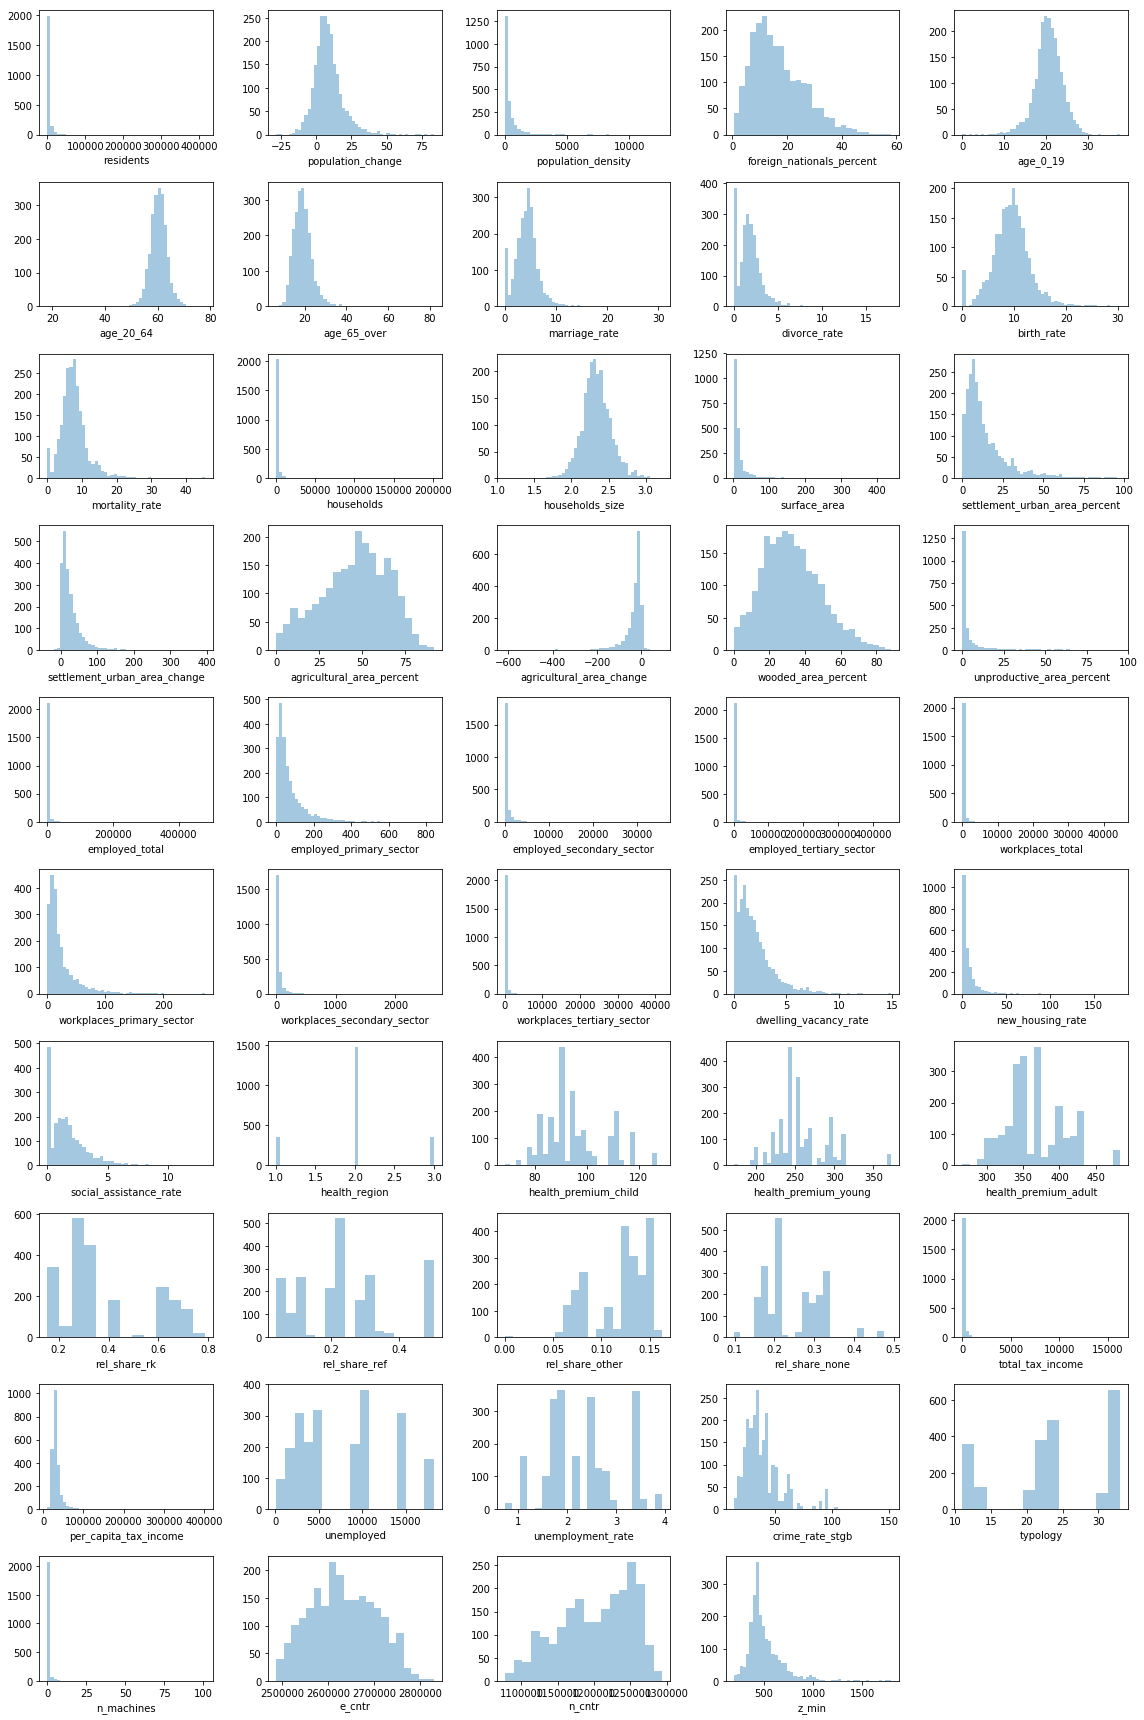

In [2]:
# plot the distributions of features
cols = [x for x in df.columns if not x in ["name", "language", "canton", "po_value"] and not x.startswith("vote_share")]
fig, axs = plt.subplots(10, 5, figsize = (16, 24))
for i, ax in enumerate(axs.flatten()):
    if i < len(cols):
        sns.distplot(df[cols[i]], kde = False, ax = ax)
    else:
        ax.set_axis_off()
plt.tight_layout()

Findings

- a lot of the variables have a bell-shape distribution and do not have far outliers (population change, foreign nationals percent, age, birth/mortality... rate, most area_percent, etc.). That is a good sign that they can be used essentially as-is (standardized for lin. regr.)
- still many variables are strongly right-skewed (long right tail, far outliers), e.g. residents (and a lot of related e.g. households, employed, workplaces, total tax income), surface area or new housing rate
    - for linear regression, this needs to be handled; either remove outliers (e.g. six largest cities are much larger than all others) or applying e.g. log transformation
- number of ticket vending machines in a commune is not useful like this (most communes have 0, very right-skewed) and should be replaced in the implementation with distance to next ticket vending machine to get a measure for how connected a commune is

#### Target

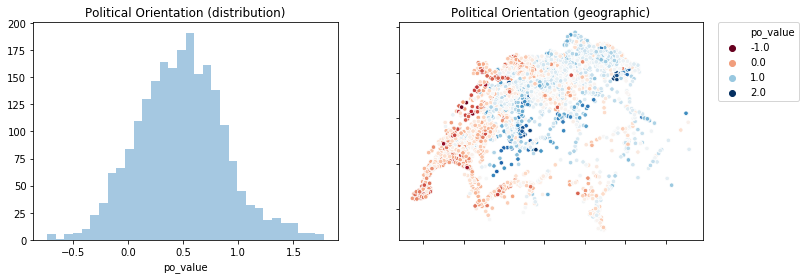

In [3]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
sns.distplot(df["po_value"], kde=False, ax=axs[0]).set_title("Political Orientation (distribution)")
sns.scatterplot(data=df, x="e_cntr", y="n_cntr", hue="po_value", palette="RdBu", s=20, ax=axs[1])
plt.title("Political Orientation (geographic)")
plt.xlabel("")
plt.ylabel("")
axs[1].set(xticklabels=[])
axs[1].set(yticklabels=[])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
plt.show()

In [4]:
df["po_value"].describe()

count    2196.000000
mean        0.483413
std         0.395245
min        -0.734976
25%         0.214848
50%         0.482292
75%         0.734602
max         1.776557
Name: po_value, dtype: float64

 - the po-value of the Swiss communes has a mean of 0.48 and a standard deviation of 0.40
 - the distribution is bell-shaped and almost symmetric and there are no outliers (everything within +/-3 std.)
 - looks well suited as a target variable
 - there is a distinct geographic pattern which I hope the non-linear models can learn
 - again, for a detailled discussion including standard deviation (polarization) of the votes at commune level, see notebook [Political Parties in CH](./Political%20Parties%20in%20CH.ipynb)

#### Correlations

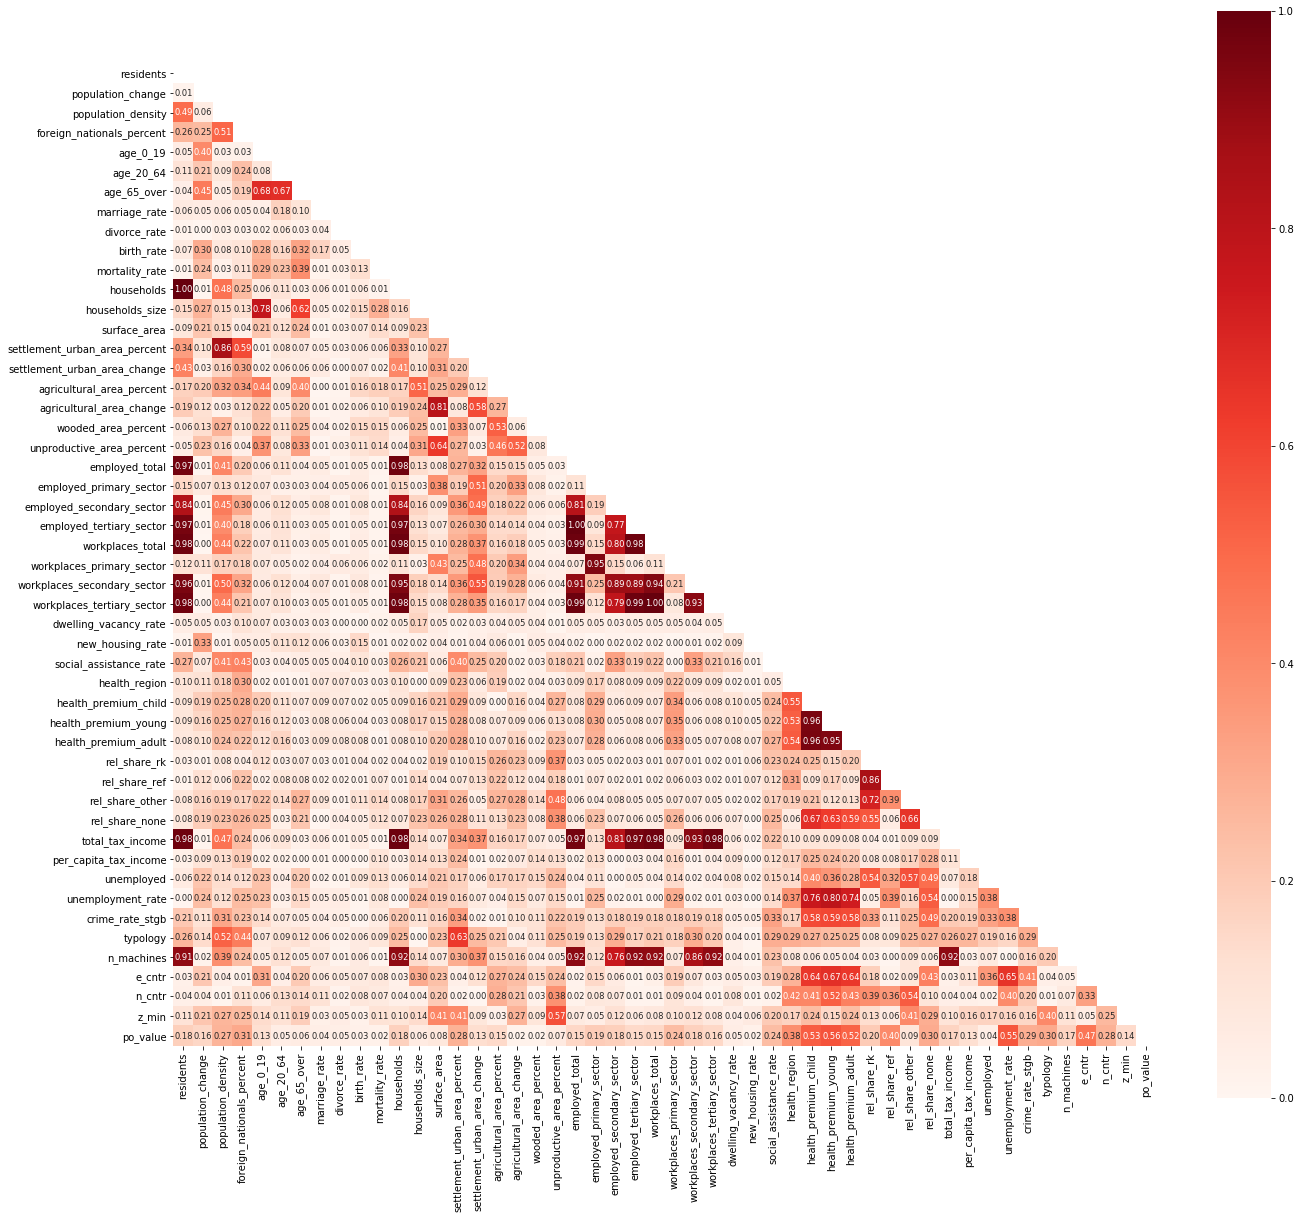

In [5]:
plt.figure(figsize = (22,20))

cols = [x for x in df.columns if not x.startswith("vote_share")]
cols.remove("po_value")
cols.append("po_value") # put it at the end

corr = np.abs(df[cols].corr()) # ignore the sign for this plot
sns.heatmap(corr, annot = True, fmt = '.2f',
            square=True, vmin = 0, vmax = 1, cmap= 'Reds', mask = np.triu(corr), annot_kws = {"fontsize":"small"});

Findings

- there is a high amount of collinearity between several variables, which would lead to problems in the linear regression model if not handled (numerical instability, reduced interpretability)
    - possible action is to identify groups of collinear variables and pick only a single representative (e.g. pick residents and drop households, employed, workplaces etc.)
- from the continous variables, medium correlations with the po-value like health premiums, religion, unemployment and interestingly, longitude (east/west location) look promising
- lower correlations but perhaps still useful are population density, foreign nationals, primary sector workplaces, social assistance rate 

Categorical variables

In [6]:
df["language"].value_counts()

de    1408
fr     638
it     130
rm      20
Name: language, dtype: int64

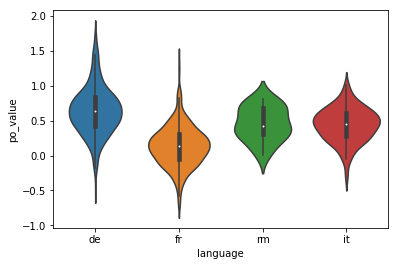

In [7]:
sns.violinplot(data=df, x="language", y="po_value");

- there is a significant difference in the po-value between german and french speaking communes (which make up > 92% of communes)
- https://www.atlas.bfs.admin.ch/maps/13/de/12474_3175_235_227/20584.html
- note that fr/de are roughly aligned along west/east, which is at least partially explains why longitude was identified as a helpful variable above

canton
NE   -0.126306
GE   -0.077506
JU   -0.048115
BS    0.145005
VD    0.154801
BL    0.236412
VS    0.281907
FR    0.283175
ZG    0.293656
GL    0.308422
TI    0.408221
SO    0.445810
LU    0.502059
AI    0.545316
SG    0.614731
ZH    0.625123
AG    0.632785
GR    0.640945
UR    0.682868
TG    0.702993
BE    0.790726
SH    0.847708
SZ    0.920607
OW    0.967382
NW    1.320663
AR    1.514270
Name: po_value, dtype: float64


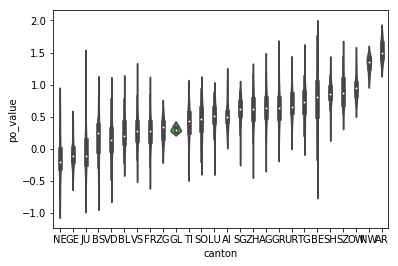

In [8]:
grouped_cantons = df.groupby(by="canton").mean()["po_value"].sort_values()
print(grouped_cantons)
sns.violinplot(data=df, x="canton", y="po_value", order=grouped_cantons.index);

- the cantons have a significant effect on the po-value
- but a lot of that variance might already be explained by language and longitude

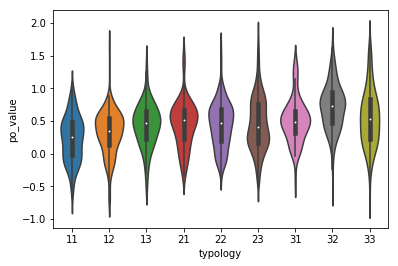

In [9]:
sns.violinplot(data=df, x="typology", y="po_value");

- at first look, it is uncertain if the typology is useful to predict the po-value
- especially since most communes are of the 2x types that don't look very different

#### Interactions

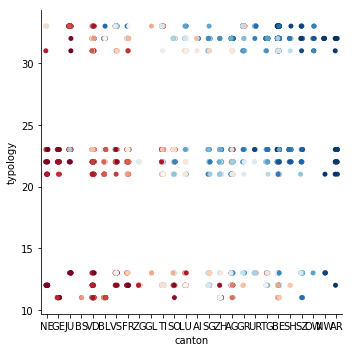

In [10]:
sns.catplot(data=df, x="canton", y="typology", hue="po_value", palette="RdBu", order=grouped_cantons.index, legend=False);

- this shows the interaction of canton and typology
- it seems like, especially for the "centric" cantons, the typology can help to further distinguish between more left (urban, 1x) and right (rural, 3x) communes

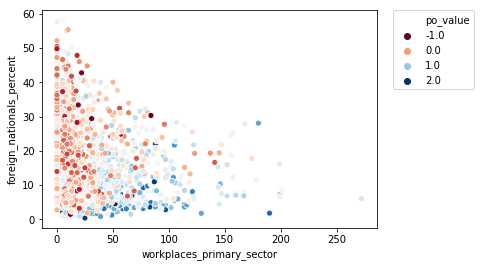

In [11]:
sns.scatterplot(data=df, x="workplaces_primary_sector", y="foreign_nationals_percent", hue="po_value", palette="RdBu")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
plt.show()

### (b) How does the EDA inform your project plan?

What interesting patterns do you observe in the data? What problems do you identify?
- it might be a problem that there are no strong correlations and thus the linear regression model might not perform well
- location matters a lot 

What insight can you gain to inform your data processing and your modelling?
- engineer geographic features that help exploit the observed patterns
- use Ridge regression to mitigate the problem of collinearities
- try non-linear models in addition to linear regression

### (c) What further EDA do you plan for project?

- plot all features against the target, check for non-linear dependencies
- Apply principal component analysis to the features and use a scree plot to analyze it

## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

To predict the political orientation of a commune (measured by the numerical po-value) is a regression problem. I will use a linear regression model and tune it using the techniques that we have learned in course 3 to minimize the mean absolute error (e.g. outlier removal, feature engineering, standardization, regularization). This model should have a good *interpretability* and I would like to get from it insights like (hypothetical example) "other things equal, when health premiums are 10 Fr. higher, a commune leans on average 0.08 po-values to the left".

Then I want to find out if the linear regression model can be outperformed by some of the non-linear models that we learnt about in course 4. There we used them for classification tasks, but my research shows that there are variants for regression tasks in scikit-learn or Keras that I can use.

Finally, if indeed some model outperforms linear regression (has better mean average error), I will discuss the accuracy vs. interpretability trade-off that occurs.

### (b) What models are you planning to use and why?

Following the guide in Scikit-learn "choosing the right estimator" [cheat sheet](#sklearn-ml-map):

1. Ridge Regression (linear model)  
    https://scikit-learn.org/stable/modules/linear_model.html#regression  
    The linear model has a good interpretability. Using Ridge regression has the advantage that it does not suffer from multicollineraties in the features. 

2. Gradient Tree Boosting for regression (non-linear ensemble method)  
    https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
    The advantage of this method is that it can combine an ensemble of weak base learners (decision trees) to get a strong model. 
    
3. Support Vector Regression (non-linear)  
    https://scikit-learn.org/stable/modules/svm.html#regression  
    The versatility of the different kernel functions could be an advantage of using SVR. Other advantages like that it is effective in high-dimensional spaces or memory efficiency (only uses a subset of training points) do not seem to apply here.



### (c) Please tell us your detailed machine learning strategy 

Preprocessing
- one-hot encoding of categorical features
- train/test sample split
- remove outliers
- transformation (log or sklearn power-transformer) (for linear regression)  
- standardize features (zero mean, unit variance) (for linear regression)  
- normalize (min/max 0/1) (for support vector regression with rbf kernel)

Baseline
- predict the mean as baseline
- baseline MAE used in $R^2$ to calculate model performance (explained variance)

Training/Tuning
- grid-search with cross-validation for hyperparameters
- ensure optimal use of multi-core cpu for good runtime performance

Compare
- calculate mean average error (MAE) and $R^2$ for each model
- discussion of results

Strategy for the train/test sample split:
- I will do the common 80/20 split (80% for training, 20% "held out" for test). The training will be done using n-fold cross-validation (e.g. n=5) as described [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance).

Ridge regression hyperparameters:
- regularization strength (alpha)  
    
Gradient Tree Boosting hyperparameters:
- number of boosting stages (n_estimators)
- learning_rate
- fraction of samples for fitting base learners (subsample)
- tree max_depth, min_samples_split, min_samples_leaf
- a detailed tuning example is here: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/ 

Support Vector Regression hyperparameters:
- kernel
- degree of polynomial kernel
- kernel coefficient (gamma)
- regularization parameter (C)
- see https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167


### Scikit-learn "choosing the right estimator" cheat sheet
<a class="anchor" id="sklearn-ml-map"></a>
https://scikit-learn.org/stable/_static/ml_map.png  
![title](https://scikit-learn.org/stable/_static/ml_map.png)

## 5) Additional information
--